In [91]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

In [92]:
data_raw = pd.read_csv('cluster2.csv', header = None).values
data = pd.DataFrame(data_raw, columns=['x', 'y'])

In [93]:
data.head()

,x,y
0,-0.42921,-2.0902
1,-0.58220,-1.8814
2,1.13240,1.6742
3,-0.19600,-2.5856
4,-0.66683,-2.6191


In [94]:
import warnings
warnings.filterwarnings("ignore")

wcss = []

for i in range(1, 11):
    kmeans = KMeans(n_clusters=i)
    kmeans.fit(data)
    wcss.append(kmeans.inertia_)

In [95]:
centroids = kmeans.cluster_centers_

print("Centroids of clusters:")
print(centroids)

Centroids of clusters:
[[ 3.19605882 -1.97353794]
 [-0.12563662 -1.32537691]
 [ 0.83996897  0.72019206]
 [-0.60507656 -2.33762946]
 [ 1.08673    -1.96017684]
 [ 0.42672869  1.67662063]
 [ 0.0325647   0.46157754]
 [ 2.09454453 -1.96070609]
 [-1.07203609 -1.55855904]
 [ 0.71848919 -0.33307365]]


In [96]:
print("WCSS")
print(wcss)

WCSS
[3180.0382581808885, 1778.8011120416954, 705.9218507355704, 558.0057950139578, 440.993282092979, 383.04784525958405, 339.4565564051828, 301.92034122309497, 267.3546083352756, 239.36847228303333]


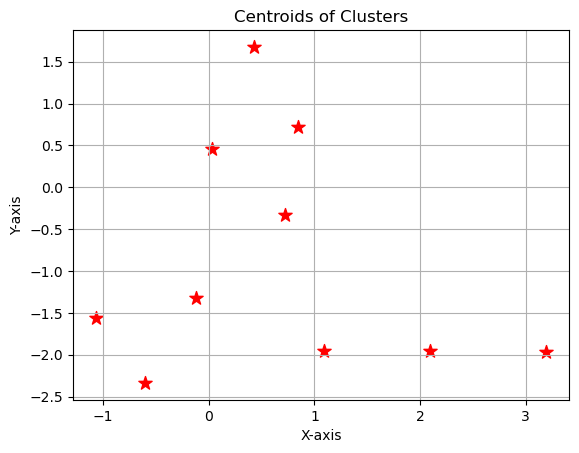

In [97]:
plt.scatter(centroids[:, 0], centroids[:, 1], marker='*', color='red', s=100)  # Adjust marker, color, and size as needed
plt.title('Centroids of Clusters')
plt.xlabel('X-axis')
plt.ylabel('Y-axis')
plt.grid(True)
plt.show()

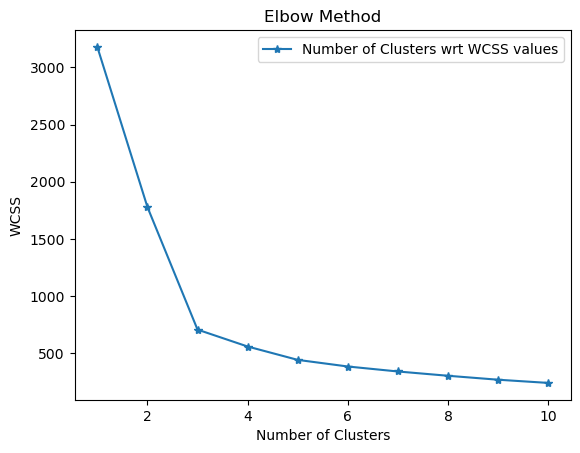

In [98]:
plt.plot(range(1, 11), wcss, marker='*', label = 'Number of Clusters wrt WCSS values')
plt.title('Elbow Method')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.legend()
plt.show()

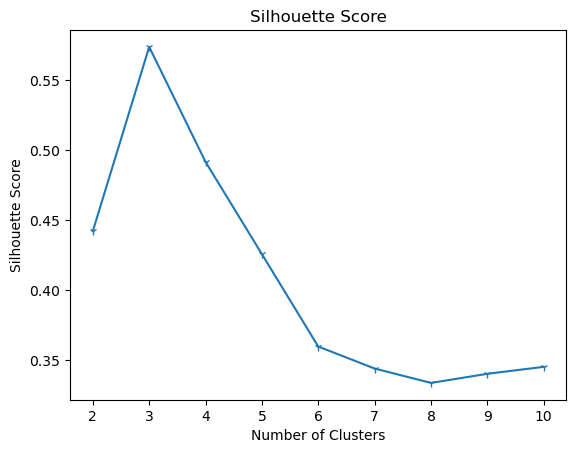

In [99]:
import warnings
warnings.filterwarnings("ignore")

silhouette_scores = []
for n_clusters in range(2, 11):
    kmeans = KMeans(n_clusters=n_clusters, init='k-means++', max_iter=300, n_init=10, random_state=0)
    cluster_labels = kmeans.fit_predict(data)
    silhouette_avg = silhouette_score(data, cluster_labels)
    silhouette_scores.append(silhouette_avg)

# Plotting the Silhouette Score graph
plt.plot(range(2, 11), silhouette_scores, marker='1', label = 'Number of Clusters wrt WCSS values')
plt.title('Silhouette Score')
plt.xlabel('Number of Clusters')
plt.ylabel('Silhouette Score')
plt.show()

In [100]:
optimal_k = 3

final_model = KMeans(n_clusters=optimal_k)
final_model.fit(data)

print("Optimal number of clusters:", optimal_k)

Optimal number of clusters: 3


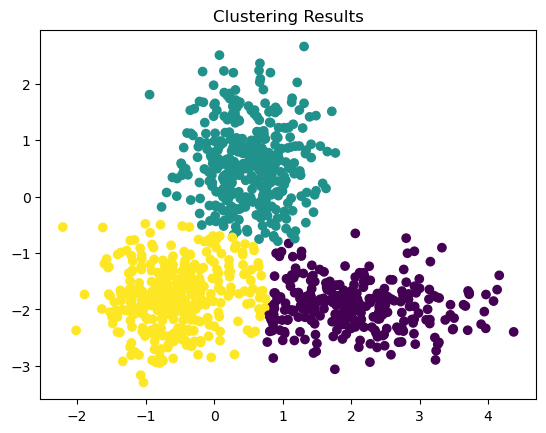

In [101]:
plt.scatter(data.iloc[:, 0], data.iloc[:, 1], c=final_model.labels_, cmap='viridis')
plt.title('Clustering Results')
plt.show()

# **JUSTIFICATION**

I used K means algorithm to seperate the number of clusters in the given data, here the number of clusters is unknown, to find the number of clusters, concept of Within Clusters Sum of Squares(wcss) is used, firstly for the different number of clusters, the  model will keep a random centroid and it will find the distance between the centroid and the each data point and it will do the same for all the data points in that particular cluster, after that it will finalize the centroid value, and the it will do the same for all the number of cluster values according to the loop.

In the elbow method graph, at a particular point the graph line will turn to give a elbow like shape, that particular value in the x-axis is the number of clusters having in the given data.

The silhoutte score is something finding the values of cohesion and separation, and then computing the silhoutte coefficient, in plotted graph, at a particular cluster will have a highest silhoutte coefficient value like near to 1, it exactly says the number of clusters in the given dataset.

 The values of centroid and the wcss for all the number of clusters are printed in the code. **The Elbow method and Silhoutte coefficient conclude that the number of clusters having in given dataset is 3.**